In this code example, we'll use different progress curves to re-time (or in other words, re-parameterize) the spline we computed in the previous example.

In [1]:
%pylab inline
from pylab import *

import mpl_toolkits.mplot3d

import path_utils
path_utils.add_relative_to_current_source_file_path_to_sys_path("../../lib")

import flashlight.curve_utils  as curve_utils
import flashlight.spline_utils as spline_utils

Populating the interactive namespace from numpy and matplotlib
Initializing flashlight v0.0.1


We compute a spline curve exactly as in the previous example. Note that the native parameterization of this spline curve does not distribute samples evenly along the curve. The samples are bunched together at the kinks. In this code example, we will re-parameterize the curve according to a progress curve that we define ourselves.

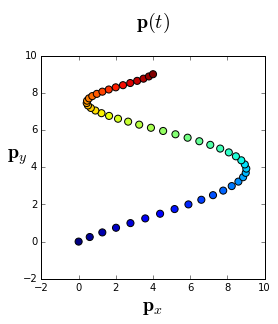

In [2]:
T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_y, T_x]
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_y, P_x]

num_samples = 50

C, T, sd = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd, num_samples=num_samples)

t = T_eval[:,0]

figsize(4,4);
scatter(P_eval[:,1], P_eval[:,0], c=T_eval[:,0], s=50);
gca().set_aspect("equal")
title("$\\mathbf{p}(t)$\n", fontsize=20);
ylabel("$\\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\\mathbf{p}_x$", fontsize=20);

In the simplest case, we re-parameterize our spline to make uniform progress as we sweep through parameter space. In other words, we compute an arc-length re-parameterization of our spline, where the re-parameterized spline traverses a fixed amount of arc length, for a fixed change in its parameter value. To compute such a re-parameterization, our first step is to define a linear progress curve.

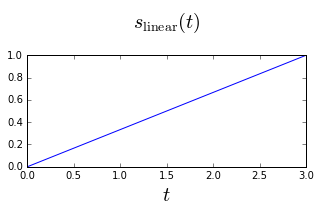

In [3]:
s_linear = linspace(0.0, 1.0, num_samples)

figsize(5,2);
plot(t, s_linear);
title("$s_{\mathrm{linear}}(t)$\n", fontsize=20); xlabel("$t$", fontsize=20);

We compute our re-parameterization by calling `curve_utils.reparameterize_curve`. We pass in the original spline samples, as well as the progress curve we want the re-parameterized spline to have. This function returns several values, but the most important value being returned `P_eval_linear`. This array contains samples for the re-parameterized spline. When we plot the re-parameterized curve, we see that our samples are spaced evenly along the curve, because this is the behavior we defined in our progress curve.

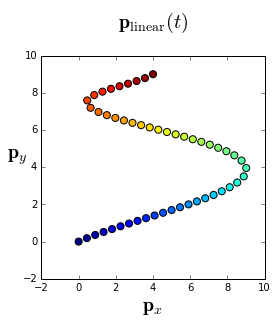

In [4]:
P_eval_linear, t_linear, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_linear)

figsize(4,4);
scatter(P_eval_linear[:,1], P_eval_linear[:,0], c=t, s=50);
gca().set_aspect("equal")
title("$\\mathbf{p}_{\\mathrm{linear}}(t)$\n", fontsize=20);
ylabel("$\\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\\mathbf{p}_x$", fontsize=20);

We can use any method we want to compute our preferred progress curve. For example, we can define a sigmoid function to give us a slow-fast-slow progress curve.

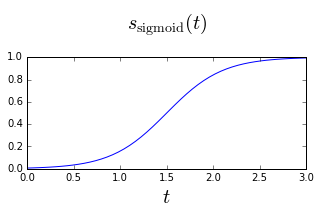

In [5]:
t_sigmoid_min = -5
t_sigmoid_max = 5
t_sigmoid     = linspace(t_sigmoid_min, t_sigmoid_max, num_samples)
s_sigmoid     = 1 / (1 + np.power(e, -t_sigmoid))

figsize(5,2);
plot(t, s_sigmoid);
title("$s_{\\mathrm{sigmoid}}(t)$\n", fontsize=20); xlabel("$t$", fontsize=20);

We see this slow-fast-slow behavior when we plot our re-parameterized spline.

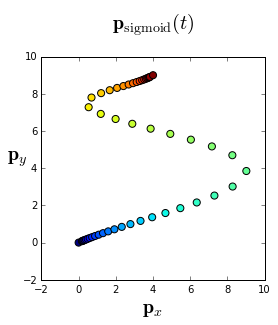

In [6]:
P_eval_sigmoid, t_sigmoid, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_sigmoid)

figsize(4,4);
scatter(P_eval_sigmoid[:,1], P_eval_sigmoid[:,0], c=t, s=50);
gca().set_aspect("equal")
title("$\\mathbf{p}_{\\mathrm{sigmoid}}(t)$\n", fontsize=20);
ylabel("$\\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\\mathbf{p}_x$", fontsize=20);

We can also define a slow-fast-slow progress curve using a 1D spline.

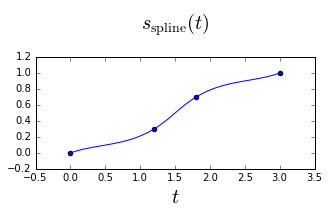

In [7]:
T_s = matrix([0.0,1.2,1.8,3.0]).T.A
P_s = matrix([0.0,0.3,0.7,1.0]).T.A

C_s, T_s, sd_s = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P_s, T_s, degree=7, lamb=[0,0,0,1,0])
    
P_s_eval, T_s_eval, dT_s = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C_s, T_s, sd_s, num_samples=num_samples)

s_spline = P_s_eval

figsize(5,2);
plot(t, s_spline); scatter(T_s[:,0], P_s[:,0]);
title("$s_{\\mathrm{spline}}(t)$\n", fontsize=20); xlabel("$t$", fontsize=20);

Again, we see this slow-fast-slow behavior when we plot our re-parameterized 2D spline.

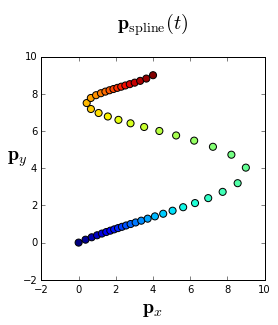

In [8]:
P_eval_spline, t_spline, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_spline)

figsize(4,4);
scatter(P_eval_spline[:,1], P_eval_spline[:,0], c=t, s=50);
gca().set_aspect("equal")
title("$\\mathbf{p}_{\\mathrm{spline}}(t)$\n", fontsize=20);
ylabel("$\\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\\mathbf{p}_x$", fontsize=20);

We call `curve_utils.reparameterize_curve` in exactly the same way to re-parameterize a 3D curve.

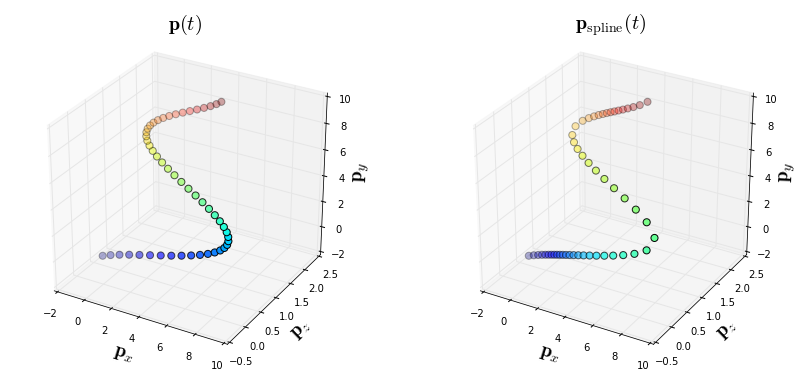

In [9]:
T_z = matrix([0,1,2,3]).T.A
T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_z, T_y, T_x] 
P_z = matrix([0,0,1,2]).T.A
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_z, P_y, P_x]

C, T, sd = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd,num_samples=num_samples)

P_eval_spline, t_spline, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_spline)

figsize(14,6);
fig = plt.figure();

ax = fig.add_subplot(121, projection="3d");
ax.scatter(P_eval[:,2], P_eval[:,0], P_eval[:,1], c=t, s=50);
title("$\\mathbf{p}(t)$\n", fontsize=20);
ax.set_zlabel("$\\mathbf{p}_y$", fontsize=20);
xlabel("$\\mathbf{p}_x$", fontsize=20); ylabel("$\\mathbf{p}_z$", fontsize=20);

ax = fig.add_subplot(122, projection="3d");
ax.scatter(P_eval_spline[:,2], P_eval_spline[:,0], P_eval_spline[:,1], c=t, s=50);
title("$\\mathbf{p}_{\\mathrm{spline}}(t)$\n", fontsize=20);
ax.set_zlabel("$\\mathbf{p}_y$", fontsize=20);
xlabel("$\\mathbf{p}_x$", fontsize=20); ylabel("$\\mathbf{p}_z$", fontsize=20);